### **회귀(Regression)**
 연속적인 출력값을 예측하는 작업  
 입력 변수 `x`로부터 출력 변수 `y`의 값을 예측하는게 목표다. 

 - ex) 집값, 주식 가격, 키 등

 출력이 이산적이라면 회귀가 아닌 **분류(Classification)** 문제이다.

 - ex) 고양이/강아지 분류


### **선형 회귀(Linear Regression)**
 입력 변수`x`와 출력 변수`y` 간의 관계를 가중치`w`의 선형 결합으로 모델링하여 연속적인 값을 예측하는 방법  
 기본적인 형태는 아래와 같다:
 $$ y = wx + b $$
 - `w`: 가중치(weights)
 - `b`: 편향(bias)  

 입력변수 `x`가 다항식의 꼴일경우 다항회귀라 불리며 형태는 아래와 같다.  
 (여전히 `w`에 대해 선형이기 때문에 선형회귀로 분류된다.)
 $$ y = w_nx^n + w_{n-1}x^{n-1} + ... + w_{1}x + w_{0} $$

##### 실습

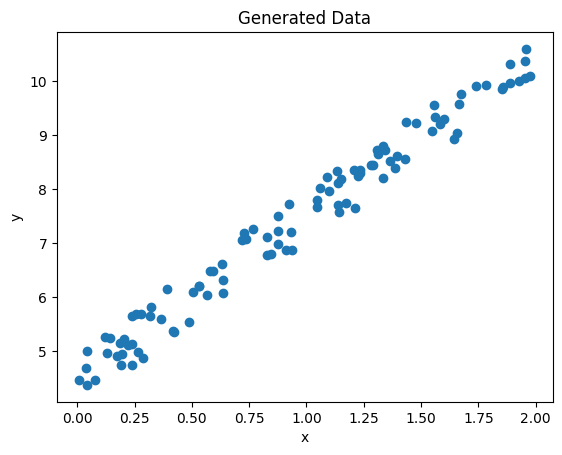

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 * np.random.rand(100, 1) # [0,1) 범위의 무작위 값 x 100개
y = 3 * x + 4 + np.random.rand(100, 1) # y = 3x + 4 + noise

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

w: 2.97
b: 4.56


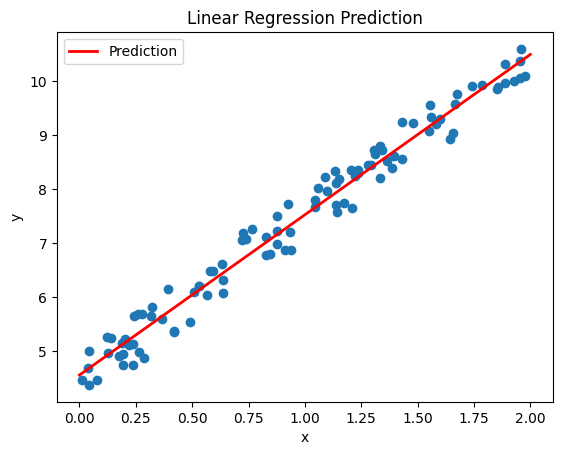

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print(f"w: {lin_reg.coef_[0][0]:.2f}")
print(f"b: {lin_reg.intercept_[0]:.2f}")


"""
# np.linspace(0, 2, 100)
- 0에서 2까지 100개의 균일한 값을 생성한다.
즉, 0, 0.02, 0.04, 0.06, …, 2.00 형태의 배열이 만들어진다.
이렇게 하면 X축(입력값)에서 일정한 간격으로 테스트 데이터를 생성할 수 있다.
목적: 학습된 모델이 예측하는 직선을 그리기 위한 X값들.
# .reshape(100, 1)
np.linspace()가 생성한 값은 기본적으로 1차원 배열(길이 100).
sklearn의 predict() 메서드는 입력값을 (샘플 수, 특성 수) 형태로 받는다.
따라서 (100, 1) 형태로 reshape해준다.
"""
x_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = lin_reg.predict(x_new)



plt.scatter(x, y)
plt.plot(x_new, y_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Linear Regression Prediction")
plt.show()

### **경사하강법(Gradient Descent)**
 손실함수를 최소화하기 위해 현재 위치에서 손실함수가 가장 빠르게 증가하는 방향(기울기 벡터)의 반대 방향으로 이동하는 방법  
  $$ θ_{new} = θ_{old} - α \cdot ∇_θJ(θ) $$
  
  - `θ`: 파라미터 벡터
  - `α`: 학습률
  - `∇_θJ(θ)`: 기울기 벡터(Gradient vector)

  `∇`: '델' 이라고 함. 나블라 기호로 표현  
  `J(θ)`: 손실함수(loss function)


#### 추가: ∇_θJ(θ) 유도
손실함수로 MSE를 사용한다면 아래와 같이 표현할 수 있다.
$$ J(θ) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{i} - y^{i})^{2} $$
이를 벡터로 표현하면:
$$ J(θ) = \frac{1}{m} (X_{b}θ - y)^{T}(X_{b}θ - y) $$

- X_b: bias term이 포함된 입력 행렬 ex) [1, x] (크기: m x 2)  
(bias term을 포함하는 이유: bias도 벡터연산으로 한번에 학습하기 위해)

- θ: 파라미터 벡터 ([b, w]) (크기: 2 x 1)
- y: 실제값 벡터 (크기: m x 1)  


이를 θ에 대해 미분하자.

**1. 전개** 
$$ J(θ) =  \frac{1}{m} (θ^{T}X_{b}^{T}X_{b}θ - 2y^{T}X_{b}θ - y^{T}y) $$

**2. θ에 대해 미분**
$$ ∇_{θ}J(θ) = \frac{1}{m} (2X_{b}^{T}X_{b}θ - 2X_{b}^{T}y) $$ 

**3. 정리**
$$ ∇_{θ}J(θ) = \frac{2}{m}X_{b}^{T}(X_{b}θ - y) $$

##### 실습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 * np.random.rand(100, 1) # [0,1) 범위의 무작위 값 x 100개
y = 3 * x + 4 + np.random.rand(100, 1) # y = 3x + 4 + noise

learning_rate = 0.1
n_iterations = 1000
m = 100

# 파라미터 초기화
theta = np.random.randn(2, 1) # [b, w]

# 입력 데이터를 [1, x] 형태로 만듬 -> bias도 벡터연산으로 한번에 학습하기 위함
x_b = np.c_[np.ones((100, 1)), x]

for iterations in range(n_iterations):
    gradients = (2/m) * x_b.T.dot(x_b.dot(theta) - y) # gradients 구하는 공식. MSE를 θ로 편미분하면 나옴.
    theta = theta - learning_rate * gradients
print(f"θ (bias, weights): {theta.ravel()}") # 학습 후 파라미터. for 내에 넣어서 확인해 보면 점점 수렴하는걸 확인 가능

θ (bias, weights): [4.55808002 2.96827553]


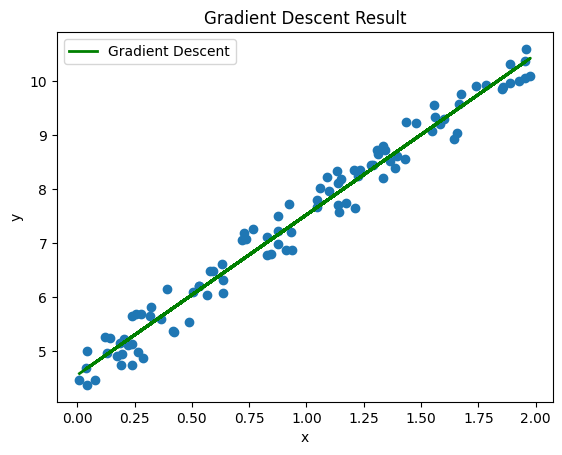

In [28]:
y_pred_gd = x_b.dot(theta)

plt.scatter(x, y)
plt.plot(x, y_pred_gd, color='green', linewidth = 2, label = 'Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Gradient Descent Result")
plt.show()